In [68]:
# Base -----------------------------------
import pathlib
import sys
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from datetime import *
#para mostrar todas las columnas de la tabla
pd.set_option('display.max_columns', None)

In [69]:
# Viz ------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
plt.style.use('seaborn')

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
dffile = '/content/drive/Shareddrives/Capstone - Repsol (Group 3)/Repsol Model/FINAL DATASET/FinalMerged_diesel.csv'

df = pd.read_csv(dffile)

In [72]:
df

,Unnamed: 0.1,Unnamed: 0,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,0,0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44,3673.0,6529.0
1,1,1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294,9720.0,17280.0
2,2,2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6,188.0,335.0
3,3,3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25,1347.0,2394.0
4,4,4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2069,2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2070,2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2071,2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2072,2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [73]:
# Drop the first two columns
df = df.iloc[:, 2:]

df

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [74]:
dffileX = '/content/drive/Shareddrives/Capstone - Repsol (Group 3)/Repsol Model/FINAL DATASET/SURFACEAREA.CSV'

dfX = pd.read_csv(dffileX)

dfX = dfX.dropna(subset=['year_month'])

# Replace non-numeric values with NaN
dfX['surface_surface_area_to_build'] = pd.to_numeric(dfX['surface_surface_area_to_build'], errors='coerce')

# Convert the 'surface_surface_area_to_build' column to float64
dfX['surface_surface_area_to_build'] = dfX['surface_surface_area_to_build'].astype('float64')

# Convert 'year_month' to datetime
dfX['year_month'] = pd.to_datetime(dfX['year_month'], format='%m/%d/%y')

# Exclude rows with dates in the year 2023
dfX = dfX[dfX['year_month'].dt.year != 2023]

dfX


,year_month,region,surface_surface_area_to_build
0,2014-01-01,Valencian Region,44.0
1,2014-01-01,Madrid,294.0
2,2014-01-01,La Rioja,6.0
3,2014-01-01,Galicia,25.0
4,2014-01-01,Extremadura,16.0
...,...,...,...
1831,2022-12-01,La Rioja,2.0
1832,2022-12-01,Madrid,475.0
1833,2022-12-01,Murcia,18.0
1834,2022-12-01,Catalonia,238.0


In [75]:
import pandas as pd

# Assuming df is your initial dataframe
# Assuming dfX_cleaned is your cleaned dataframe with float64 values

# Ensure that the 'year_month' column in both dataframes is in datetime format for correct merging
df['year_month'] = pd.to_datetime(df['year_month'], errors='coerce')
dfX['year_month'] = pd.to_datetime(dfX['year_month'], errors='coerce')

# Merge df with dfX_cleaned on 'year_month' and 'region' to bring in the new values
df = df.merge(dfX[['year_month', 'region', 'surface_surface_area_to_build']],
                     on=['year_month', 'region'],
                     how='left',
                     suffixes=('', '_new'))

# Replace the old values with the new values where available
df['surface_surface_area_to_build'] = df['surface_surface_area_to_build_new'].combine_first(df['surface_surface_area_to_build'])

# Drop the temporary column used for merging
df.drop(columns=['surface_surface_area_to_build_new'], inplace=True)

# Display the updated dataframe
df


,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                2074 non-null   datetime64[ns]
 1   region                                    2074 non-null   object        
 2   total_consumption                         2074 non-null   float64       
 3   diesel_consumption                        2074 non-null   float64       
 4   diesel_price                              1462 non-null   float64       
 5   diesel_withouttaxes                       1462 non-null   float64       
 6   lastbrentprice                            2074 non-null   object        
 7   apparent_temperature_max                  2074 non-null   float64       
 8   days_holidays                             1161 non-null   float64       
 9   gasoline_fleet                

In [77]:
# Convert year_month to datetime to filter data from 2014 to 2023
df['year_month'] = pd.to_datetime(df['year_month'])

# Filter the dataset to include only entries from 2014 to 2023
df_filtered = df[(df['year_month'].dt.year >= 2014) & (df['year_month'].dt.year <= 2023)]

# Get a list of columns that will be used for null value calculation (excluding unnecessary columns)
columns_to_check = df_filtered.columns.difference(['Unnamed: 0.1', 'Unnamed: 0', 'year_month', 'region'])

# Create a pivot table with regions as columns and variables as rows showing % of null values
null_percentage_table = df_filtered.pivot_table(
    index='region',
    values=columns_to_check,
    aggfunc=lambda x: x.isnull().mean() * 100
).T

# Display the null percentage table
null_percentage_table


region,Andalusia,Aragon,Asturias,Balearic Islands,Basque Country,Canary Islands,Cantabria,Castile and León,Castile-La Mancha,Catalonia,Extremadura,Galicia,La Rioja,Madrid,Murcia,Navarre,Valencian Region
IPC,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.0
UnemRate,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.0
apparent_temperature_max,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
covid_period,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
days_holidays,33.333333,40.0,33.333333,40.0,35.0,43.333333,30.833333,100.0,37.5,30.0,31.666667,30.833333,37.500000,38.333333,33.333333,37.5,100.0
diesel_consumption,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
diesel_fleet,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.000000,100.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0
diesel_price,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
diesel_withouttaxes,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
gasoline_fleet,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.000000,100.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0


In [78]:
import pandas as pd
import numpy as np

# Function to apply the desired formatting
def highlight_cells(val):
    if val > 50:
        color = 'red'
        font_weight = 'bold'
    elif 20 < val <= 50:
        color = 'orange'
        font_weight = 'normal'
    elif 1 < val <= 20:
        color = 'lightblue'
        font_weight = 'normal'
    else:
        color = ''
        font_weight = 'normal'
    return f'background-color: {color}; font-weight: {font_weight}'

# Apply the highlighting function to the DataFrame
styled_null_percentage_table = null_percentage_table.style.applymap(highlight_cells)

# Display the styled table
styled_null_percentage_table


region,Andalusia,Aragon,Asturias,Balearic Islands,Basque Country,Canary Islands,Cantabria,Castile and León,Castile-La Mancha,Catalonia,Extremadura,Galicia,La Rioja,Madrid,Murcia,Navarre,Valencian Region
IPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
UnemRate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
apparent_temperature_max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
covid_period,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
days_holidays,33.333333,40.000000,33.333333,40.000000,35.000000,43.333333,30.833333,100.000000,37.500000,30.000000,31.666667,30.833333,37.500000,38.333333,33.333333,37.500000,100.000000
diesel_consumption,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diesel_fleet,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,100.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
diesel_price,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
diesel_withouttaxes,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
gasoline_fleet,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,100.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000


In [79]:
# Drop the specified columns
df = df.drop(columns=['diesel_fleet', 'gasoline_fleet'])

In [80]:
df

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [81]:
# Convert 'year_month' to datetime
df['year_month'] = pd.to_datetime(df['year_month'])

# Ensure 'surface_surface_area_to_build' is converted to float, handling non-numeric values
df['surface_surface_area_to_build'] = df['surface_surface_area_to_build'].replace({',': '.', '--': '0'}, regex=True).astype(float)

In [82]:
df

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [83]:
# Define a function to calculate weighted average
def weighted_avg(df, val_col, weight_col):
    return (df[val_col] * df[weight_col]).sum() / df[weight_col].sum()

# Aggregate data for each unique date "year_month"
df_global = df.groupby('year_month').agg({
    'total_consumption': 'sum',
    'diesel_consumption': 'sum',
    'diesel_price': 'mean',
    'diesel_withouttaxes': 'mean',
    'lastbrentprice': 'first',  # Keeping 'first' as we can't convert this to a mean directly
    'apparent_temperature_max': 'mean',
    'covid_period': 'max',
    'ukraine_war_period': 'max',
    'days_holidays': 'sum',
    'gdp': 'sum',  # Needed for weighted average calculations
    'population': 'sum',  # Needed for weighted average calculations
    'touristic_region': 'sum',
    'season': 'sum',
    'surface_surface_area_to_build': 'sum',
    'matriculas_average_registration_gasoline': 'sum',
    'matriculas_average_registration_diesel': 'sum'
}).reset_index()

# Calculate weighted average for UnemRate using population
df_global['UnemRate'] = df.groupby('year_month').apply(lambda x: weighted_avg(x, 'UnemRate', 'population')).values

# Calculate weighted average for other variables using GDP
df_global['IPC'] = df.groupby('year_month').apply(lambda x: weighted_avg(x, 'IPC', 'gdp')).values
df_global['ipc_housing'] = df.groupby('year_month').apply(lambda x: weighted_avg(x, 'ipc_housing', 'gdp')).values
df_global['ipi'] = df.groupby('year_month').apply(lambda x: weighted_avg(x, 'ipi', 'gdp')).values
df_global['ipc_transport'] = df.groupby('year_month').apply(lambda x: weighted_avg(x, 'ipc_transport', 'gdp')).values
df_global['ipc_tourism'] = df.groupby('year_month').apply(lambda x: weighted_avg(x, 'ipc_tourism', 'gdp')).values

# Calculate gdp_xcapita as gdp divided by population
df_global['gdp_xcapita'] = df_global['gdp'] * 1000 / df_global['population']


In [84]:
df_global

,year_month,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,covid_period,ukraine_war_period,days_holidays,gdp,population,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,UnemRate,IPC,ipc_housing,ipi,ipc_transport,ipc_tourism,gdp_xcapita
0,2014-01-01,2817020.22,2469135.15,NaN,NaN,"106,40",10.517059,0,0,30.0,8.538266e+07,4.635568e+07,5,0,727.0,34265.0,60913.0,23.187844,0.187784,0.490487,90.166059,-0.455671,-0.224152,1841.903044
1,2014-02-01,2610980.79,2283474.50,NaN,NaN,"109,07",10.164118,0,0,1.0,8.767350e+07,4.634138e+07,5,0,768.0,34265.0,60913.0,23.189689,-0.001727,0.169606,90.192597,-0.033286,0.114806,1891.905315
2,2014-03-01,2814894.17,2442389.73,NaN,NaN,"107,76",14.177059,0,0,3.0,8.052950e+07,4.632708e+07,5,0,1084.0,34265.0,60913.0,23.191537,-0.113524,0.043148,95.731023,-0.018978,0.263314,1738.281378
3,2014-04-01,2644556.21,2260243.61,NaN,NaN,"108,07",19.292353,0,0,35.0,8.512199e+07,4.631659e+07,5,17,1282.0,34265.0,60913.0,21.897757,0.335715,-0.026508,89.897281,0.450390,0.811285,1837.829339
4,2014-05-01,2695658.31,2307027.36,NaN,NaN,"109,41",20.467647,0,0,19.0,8.559173e+07,4.630611e+07,5,17,996.0,34265.0,60913.0,21.899147,0.218115,0.072257,95.454825,0.106547,-0.122137,1848.389786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,2798769.20,2278332.10,129.183,77.5098,"85,02",23.296471,0,1,15.0,1.131505e+08,4.791682e+07,5,17,0.0,79278.0,34148.0,10.648678,3.111947,-0.705754,101.936769,-0.871311,0.213819,2361.393960
118,2023-11-01,2882649.76,2402673.60,123.639,74.1834,"80,86",16.107647,0,1,15.0,1.134621e+08,4.791682e+07,5,0,0.0,79278.0,34148.0,10.648678,2.908743,-1.416991,105.048944,-1.479031,-0.534955,2367.898176
119,2023-12-01,2847008.16,2340019.52,118.129,70.8774,"77,04",12.105882,0,1,46.0,1.266786e+08,4.791682e+07,5,0,0.0,79278.0,34148.0,10.648678,2.779520,0.527872,87.279415,-1.199313,0.151962,2643.719534
120,2024-01-01,2846239.97,2374970.99,117.262,70.3572,"80,55",13.027059,0,1,0.0,8.646194e+07,4.791682e+07,5,0,0.0,0.0,0.0,11.027126,3.016787,3.330493,98.909633,0.113289,-0.100860,1804.417446


In [85]:
# Drop the specified columns
df_global = df_global.drop(columns=['total_consumption', 'diesel_withouttaxes', 'touristic_region'])


In [86]:
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def download_excel(df):
    # Create a BytesIO buffer to save the Excel file
    output = BytesIO()
    # Using the default Excel writer
    df.to_excel(output, index=False)
    output.seek(0)

    # Encode the Excel file to base64
    data = base64.b64encode(output.read()).decode('utf-8')

    # Generate a download link
    html = '<a download="df_filled.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{0}" target="_blank">Download Excel file</a>'.format(data)
    display(HTML(html))

# Assume df is your DataFrame
download_excel(df_global)

In [87]:
# Assuming df_global is your original DataFrame

# Create a sub-data frame 'df_surface' with only the 'year_month' and 'surface_surface_area_to_build' columns
df_surface = df_global[['year_month', 'surface_surface_area_to_build']]

# Display the sub-data frame
df_surface

,year_month,surface_surface_area_to_build
0,2014-01-01,727.0
1,2014-02-01,768.0
2,2014-03-01,1084.0
3,2014-04-01,1282.0
4,2014-05-01,996.0
...,...,...
117,2023-10-01,0.0
118,2023-11-01,0.0
119,2023-12-01,0.0
120,2024-01-01,0.0


                                     SARIMAX Results                                     
Dep. Variable:     surface_surface_area_to_build   No. Observations:                  110
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -775.021
Date:                           Wed, 10 Jul 2024   AIC                           1560.043
Time:                                   11:31:01   BIC                           1573.265
Sample:                                        0   HQIC                          1565.399
                                           - 110                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3503      0.059      5.961      0.000       0.235       0.465
ar.L2          0.2609      0.139      1.872

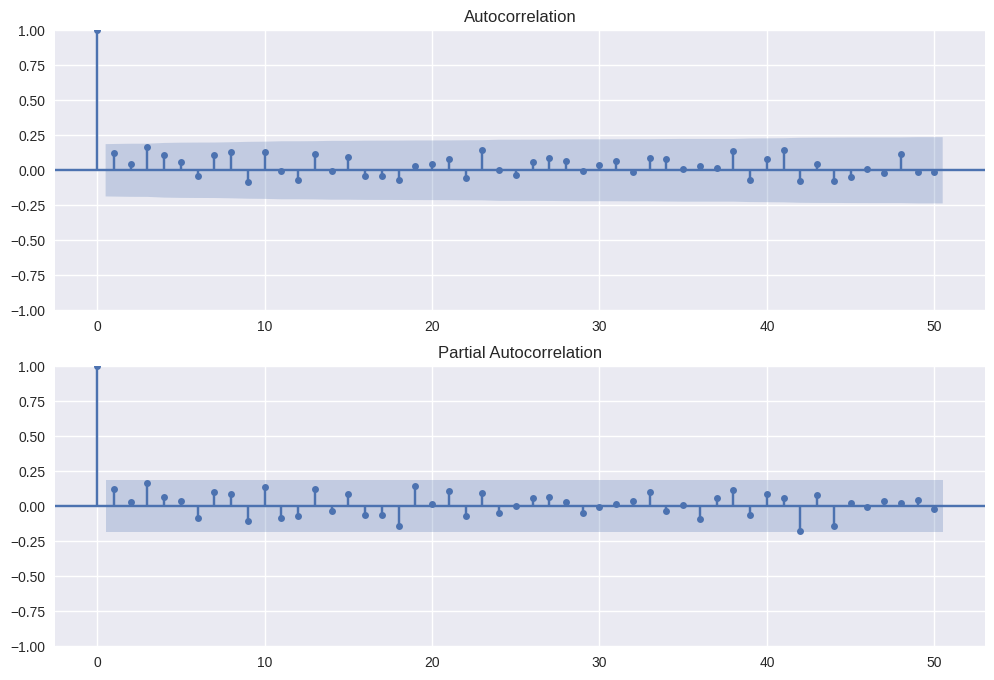

Ljung-Box test results:
      lb_stat  lb_pvalue
10  13.571511   0.193448
    year_month  surface_surface_area_to_build  predictions
0   2014-01-01                          727.0          NaN
1   2014-02-01                          768.0          NaN
2   2014-03-01                         1084.0          NaN
3   2014-04-01                         1282.0          NaN
4   2014-05-01                          996.0          NaN
..         ...                            ...          ...
117 2023-10-01                            0.0  1706.332566
118 2023-11-01                            0.0   986.032518
119 2023-12-01                            0.0  1001.436665
120 2024-01-01                            0.0          NaN
121 2024-02-01                            0.0          NaN

[122 rows x 3 columns]


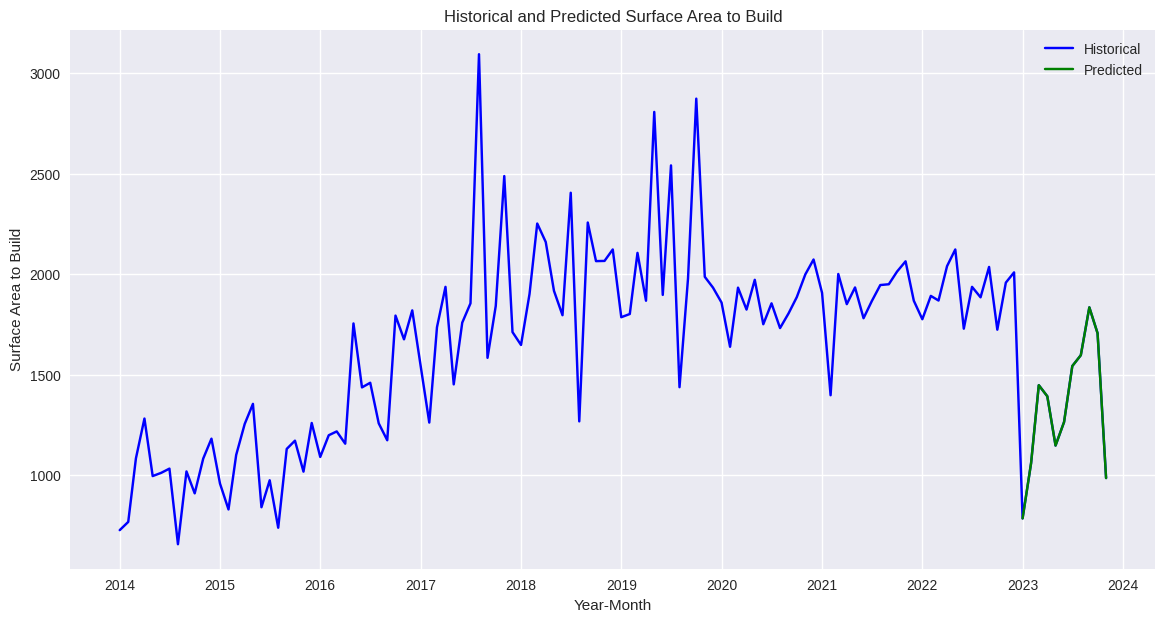

In [88]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_surface is your DataFrame
# Convert 'year_month' to datetime
df_surface['year_month'] = pd.to_datetime(df_surface['year_month'])

# Exclude rows with dates in the year 2023
df_surface_filtered = df_surface[df_surface['year_month'].dt.year != 2023]

# Fit SARIMA model
order = (2, 0, 0)  # (p,d,q)
seasonal_order = (2, 1, 0, 6)  # (P,D,Q,s)
model = SARIMAX(df_surface_filtered['surface_surface_area_to_build'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Show statistical summary
print(results.summary())

# Plot ACF and PACF of residuals
residuals = results.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, lags=50, ax=ax[0])
plot_pacf(residuals, lags=50, ax=ax[1])
plt.show()

# Ljung-Box test for white noise
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_result)

# Forecasting for 2023
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='MS')
forecast_df = forecast.predicted_mean
forecast_df.index = forecast_index

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Display the combined DataFrame
print(df_combined)

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Create the 'surface_area' column
df_combined['surface_area'] = df_combined.apply(
    lambda row: row['surface_surface_area_to_build'] if row['year_month'].year != 2023 else row['predictions'],
    axis=1
)

# Filter the combined DataFrame to only include data up to 2023-11-01
df_combined_filtered = df_combined[df_combined['year_month'] <= '2023-11-01']

# Plot the historical and predicted values
plt.figure(figsize=(14, 7))
plt.plot(df_combined_filtered['year_month'], df_combined_filtered['surface_area'], label='Historical', color='blue')
plt.plot(df_combined_filtered[df_combined_filtered['year_month'].dt.year == 2023]['year_month'],
         df_combined_filtered[df_combined_filtered['year_month'].dt.year == 2023]['surface_area'],
         label='Predicted', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Surface Area to Build')
plt.title('Historical and Predicted Surface Area to Build')
plt.legend()
plt.show()

In [89]:


# Drop the unnecessary columns
df_combined.drop(columns=['surface_surface_area_to_build', 'predictions'], inplace=True)

# Display the combined DataFrame
print(df_combined)


    year_month  surface_area
0   2014-01-01    727.000000
1   2014-02-01    768.000000
2   2014-03-01   1084.000000
3   2014-04-01   1282.000000
4   2014-05-01    996.000000
..         ...           ...
117 2023-10-01   1706.332566
118 2023-11-01    986.032518
119 2023-12-01   1001.436665
120 2024-01-01      0.000000
121 2024-02-01      0.000000

[122 rows x 2 columns]


In [90]:
# Merge df_global with df_combined on 'year_month'
df_global = pd.merge(df_global, df_combined[['year_month', 'surface_area']], on='year_month', how='left')

# Replace 'surface_surface_area_to_build' in df_global with 'surface_area' from df_combined
df_global['surface_surface_area_to_build'] = df_global['surface_area']

# Drop the 'surface_area' column as it is no longer needed
df_global.drop(columns=['surface_area'], inplace=True)

# Display the updated DataFrame
print(df_global)


    year_month  diesel_consumption  diesel_price lastbrentprice  \
0   2014-01-01          2469135.15           NaN         106,40   
1   2014-02-01          2283474.50           NaN         109,07   
2   2014-03-01          2442389.73           NaN         107,76   
3   2014-04-01          2260243.61           NaN         108,07   
4   2014-05-01          2307027.36           NaN         109,41   
..         ...                 ...           ...            ...   
117 2023-10-01          2278332.10       129.183          85,02   
118 2023-11-01          2402673.60       123.639          80,86   
119 2023-12-01          2340019.52       118.129          77,04   
120 2024-01-01          2374970.99       117.262          80,55   
121 2024-02-01          2132672.71       121.817          81,91   

     apparent_temperature_max  covid_period  ukraine_war_period  \
0                   10.517059             0                   0   
1                   10.164118             0                  

In [91]:
df_global

,year_month,diesel_consumption,diesel_price,lastbrentprice,apparent_temperature_max,covid_period,ukraine_war_period,days_holidays,gdp,population,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,UnemRate,IPC,ipc_housing,ipi,ipc_transport,ipc_tourism,gdp_xcapita
0,2014-01-01,2469135.15,NaN,"106,40",10.517059,0,0,30.0,8.538266e+07,4.635568e+07,0,727.000000,34265.0,60913.0,23.187844,0.187784,0.490487,90.166059,-0.455671,-0.224152,1841.903044
1,2014-02-01,2283474.50,NaN,"109,07",10.164118,0,0,1.0,8.767350e+07,4.634138e+07,0,768.000000,34265.0,60913.0,23.189689,-0.001727,0.169606,90.192597,-0.033286,0.114806,1891.905315
2,2014-03-01,2442389.73,NaN,"107,76",14.177059,0,0,3.0,8.052950e+07,4.632708e+07,0,1084.000000,34265.0,60913.0,23.191537,-0.113524,0.043148,95.731023,-0.018978,0.263314,1738.281378
3,2014-04-01,2260243.61,NaN,"108,07",19.292353,0,0,35.0,8.512199e+07,4.631659e+07,17,1282.000000,34265.0,60913.0,21.897757,0.335715,-0.026508,89.897281,0.450390,0.811285,1837.829339
4,2014-05-01,2307027.36,NaN,"109,41",20.467647,0,0,19.0,8.559173e+07,4.630611e+07,17,996.000000,34265.0,60913.0,21.899147,0.218115,0.072257,95.454825,0.106547,-0.122137,1848.389786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,2278332.10,129.183,"85,02",23.296471,0,1,15.0,1.131505e+08,4.791682e+07,17,1706.332566,79278.0,34148.0,10.648678,3.111947,-0.705754,101.936769,-0.871311,0.213819,2361.393960
118,2023-11-01,2402673.60,123.639,"80,86",16.107647,0,1,15.0,1.134621e+08,4.791682e+07,0,986.032518,79278.0,34148.0,10.648678,2.908743,-1.416991,105.048944,-1.479031,-0.534955,2367.898176
119,2023-12-01,2340019.52,118.129,"77,04",12.105882,0,1,46.0,1.266786e+08,4.791682e+07,0,1001.436665,79278.0,34148.0,10.648678,2.779520,0.527872,87.279415,-1.199313,0.151962,2643.719534
120,2024-01-01,2374970.99,117.262,"80,55",13.027059,0,1,0.0,8.646194e+07,4.791682e+07,0,0.000000,0.0,0.0,11.027126,3.016787,3.330493,98.909633,0.113289,-0.100860,1804.417446


In [92]:
import pandas as pd
import numpy as np

# Assuming df_global is your DataFrame
# Convert 'year_month' to datetime if it isn't already
df_global['year_month'] = pd.to_datetime(df_global['year_month'])

# Filter for rows in the year 2024
mask_2024 = df_global['year_month'].dt.year == 2024

# Replace 0s with NaNs in the specified rows
df_global.loc[mask_2024] = df_global.loc[mask_2024].replace(0, np.nan)

# Display the updated DataFrame
df_global

,year_month,diesel_consumption,diesel_price,lastbrentprice,apparent_temperature_max,covid_period,ukraine_war_period,days_holidays,gdp,population,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,UnemRate,IPC,ipc_housing,ipi,ipc_transport,ipc_tourism,gdp_xcapita
0,2014-01-01,2469135.15,NaN,"106,40",10.517059,0.0,0.0,30.0,8.538266e+07,4.635568e+07,0.0,727.000000,34265.0,60913.0,23.187844,0.187784,0.490487,90.166059,-0.455671,-0.224152,1841.903044
1,2014-02-01,2283474.50,NaN,"109,07",10.164118,0.0,0.0,1.0,8.767350e+07,4.634138e+07,0.0,768.000000,34265.0,60913.0,23.189689,-0.001727,0.169606,90.192597,-0.033286,0.114806,1891.905315
2,2014-03-01,2442389.73,NaN,"107,76",14.177059,0.0,0.0,3.0,8.052950e+07,4.632708e+07,0.0,1084.000000,34265.0,60913.0,23.191537,-0.113524,0.043148,95.731023,-0.018978,0.263314,1738.281378
3,2014-04-01,2260243.61,NaN,"108,07",19.292353,0.0,0.0,35.0,8.512199e+07,4.631659e+07,17.0,1282.000000,34265.0,60913.0,21.897757,0.335715,-0.026508,89.897281,0.450390,0.811285,1837.829339
4,2014-05-01,2307027.36,NaN,"109,41",20.467647,0.0,0.0,19.0,8.559173e+07,4.630611e+07,17.0,996.000000,34265.0,60913.0,21.899147,0.218115,0.072257,95.454825,0.106547,-0.122137,1848.389786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,2278332.10,129.183,"85,02",23.296471,0.0,1.0,15.0,1.131505e+08,4.791682e+07,17.0,1706.332566,79278.0,34148.0,10.648678,3.111947,-0.705754,101.936769,-0.871311,0.213819,2361.393960
118,2023-11-01,2402673.60,123.639,"80,86",16.107647,0.0,1.0,15.0,1.134621e+08,4.791682e+07,0.0,986.032518,79278.0,34148.0,10.648678,2.908743,-1.416991,105.048944,-1.479031,-0.534955,2367.898176
119,2023-12-01,2340019.52,118.129,"77,04",12.105882,0.0,1.0,46.0,1.266786e+08,4.791682e+07,0.0,1001.436665,79278.0,34148.0,10.648678,2.779520,0.527872,87.279415,-1.199313,0.151962,2643.719534
120,2024-01-01,2374970.99,117.262,"80,55",13.027059,NaN,1.0,NaN,8.646194e+07,4.791682e+07,NaN,NaN,NaN,NaN,11.027126,3.016787,3.330493,98.909633,0.113289,-0.100860,1804.417446


In [93]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   diesel_consumption                        122 non-null    float64       
 2   diesel_price                              86 non-null     float64       
 3   lastbrentprice                            122 non-null    object        
 4   apparent_temperature_max                  122 non-null    float64       
 5   covid_period                              120 non-null    float64       
 6   ukraine_war_period                        121 non-null    float64       
 7   days_holidays                             120 non-null    float64       
 8   gdp                                       122 non-null    float64       
 9   population                      

In [94]:
# Replace commas with dots in all columns to convert to numeric values
for col in df_global.columns:
    if df_global[col].dtype == object:
        df_global[col] = df_global[col].str.replace(',', '.').astype(float)

# Convert all other columns to float64 except 'year_month'
for col in df_global.columns:
    if col != 'year_month':
        df_global[col] = df_global[col].astype('float64')

# Drop the 'gasoline_price' column
df_global.drop(columns=['diesel_price'], inplace=True)

# Display the dataframe info to confirm changes
df_global.info()

# Calculate 12-month moving average for 'gasoline_consumption' and 'gdp_xcapita'
df_global['diesel_consumption_ma'] = df_global['diesel_consumption'].rolling(window=12).mean()
df_global['gdp_xcapita_ma'] = df_global['gdp_xcapita'].rolling(window=12).mean()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   diesel_consumption                        122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   covid_period                              120 non-null    float64       
 5   ukraine_war_period                        121 non-null    float64       
 6   days_holidays                             120 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   season                          

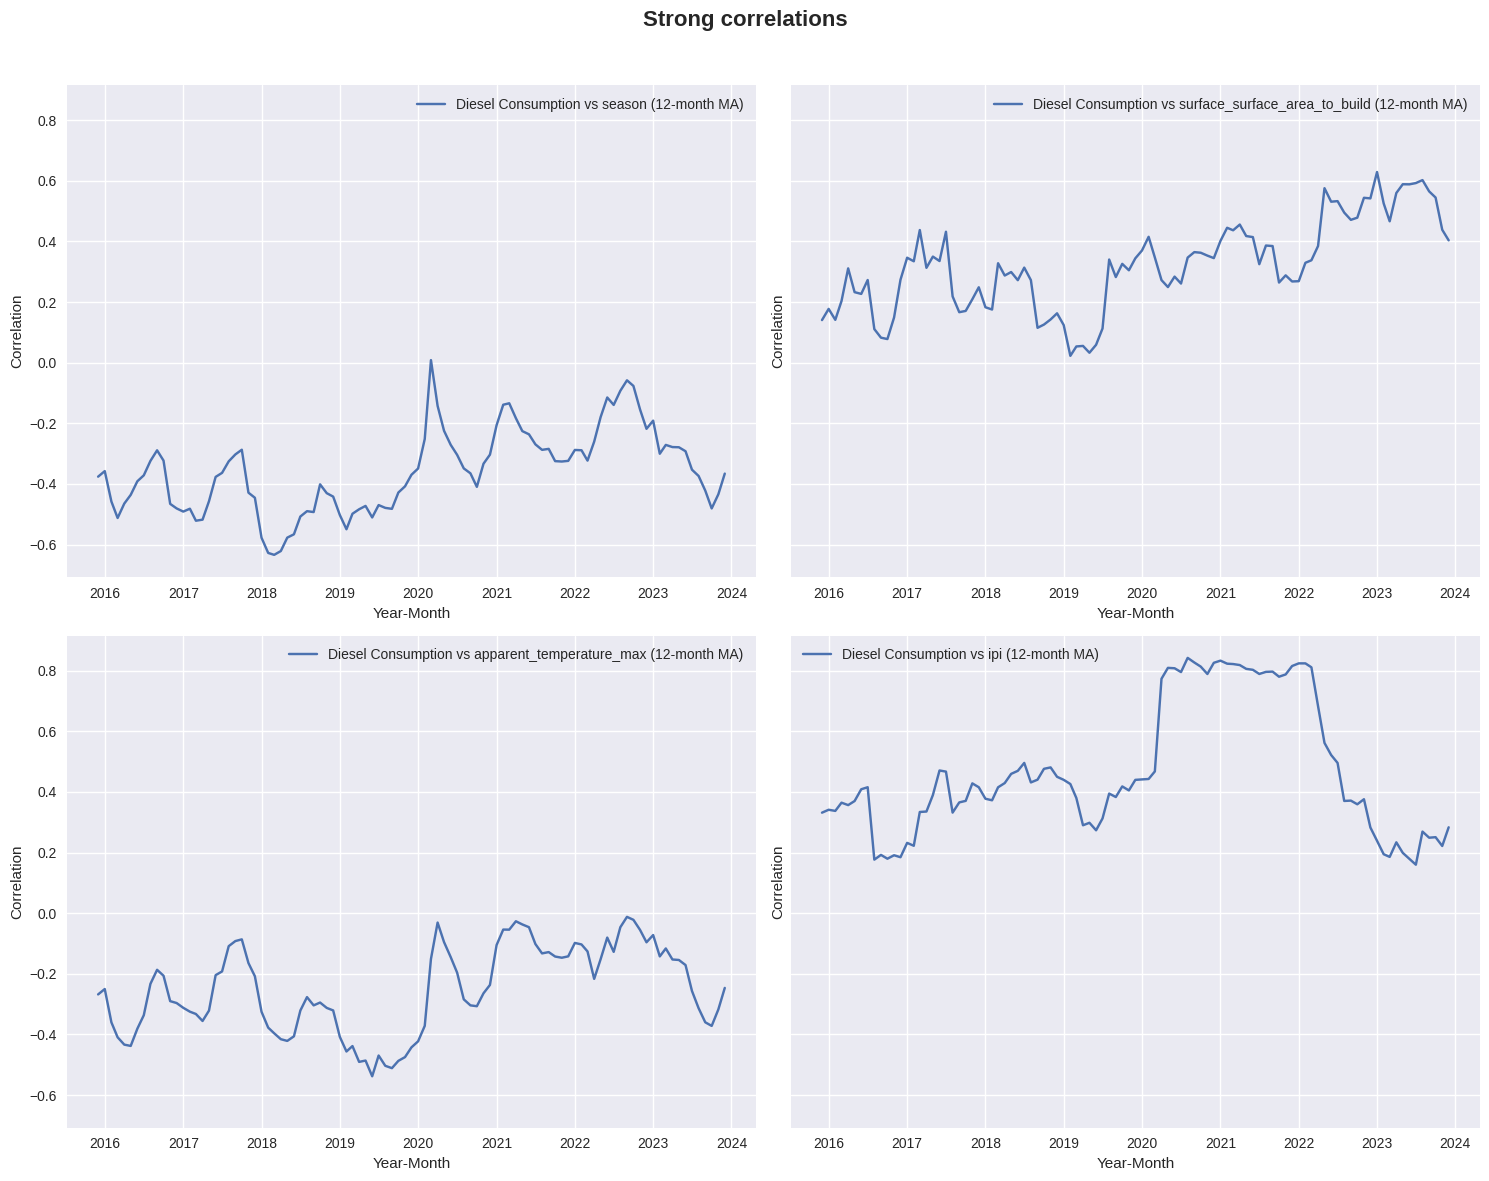

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_global[(df_global['year_month'] >= '2014-01-01') & (df_global['year_month'] <= '2023-12-31')].copy()

# Define the variables for strong correlation
variables_strong = ['season', 'surface_surface_area_to_build', 'apparent_temperature_max', 'ipi']

# Ensure that the columns exist in the dataframe
existing_columns_strong = [var for var in variables_strong if var in df_filtered.columns]

# Calculate the correlation between 'diesel_consumption' and the specified variables
for var in existing_columns_strong:
    df_filtered[f'correlation_{var}'] = df_filtered[['diesel_consumption', var]].rolling(window=24).corr().iloc[0::2, -1].reset_index(drop=True)

# Plot the 12-month moving average of the correlations in the section "Strong correlations"
fig, axes = plt.subplots(len(existing_columns_strong) // 2 + len(existing_columns_strong) % 2, 2, figsize=(15, len(existing_columns_strong) * 3), sharey=True)
fig.suptitle('Strong correlations', fontsize=16, fontweight='bold')

for i, var in enumerate(existing_columns_strong):
    ax = axes[i // 2, i % 2]
    ax.plot(df_filtered['year_month'], df_filtered[f'correlation_{var}'], label=f'Diesel Consumption vs {var} (12-month MA)')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Correlation')
    ax.legend()
    ax.grid(True)

# Remove the empty subplot if the number of plots is odd
if len(existing_columns_strong) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

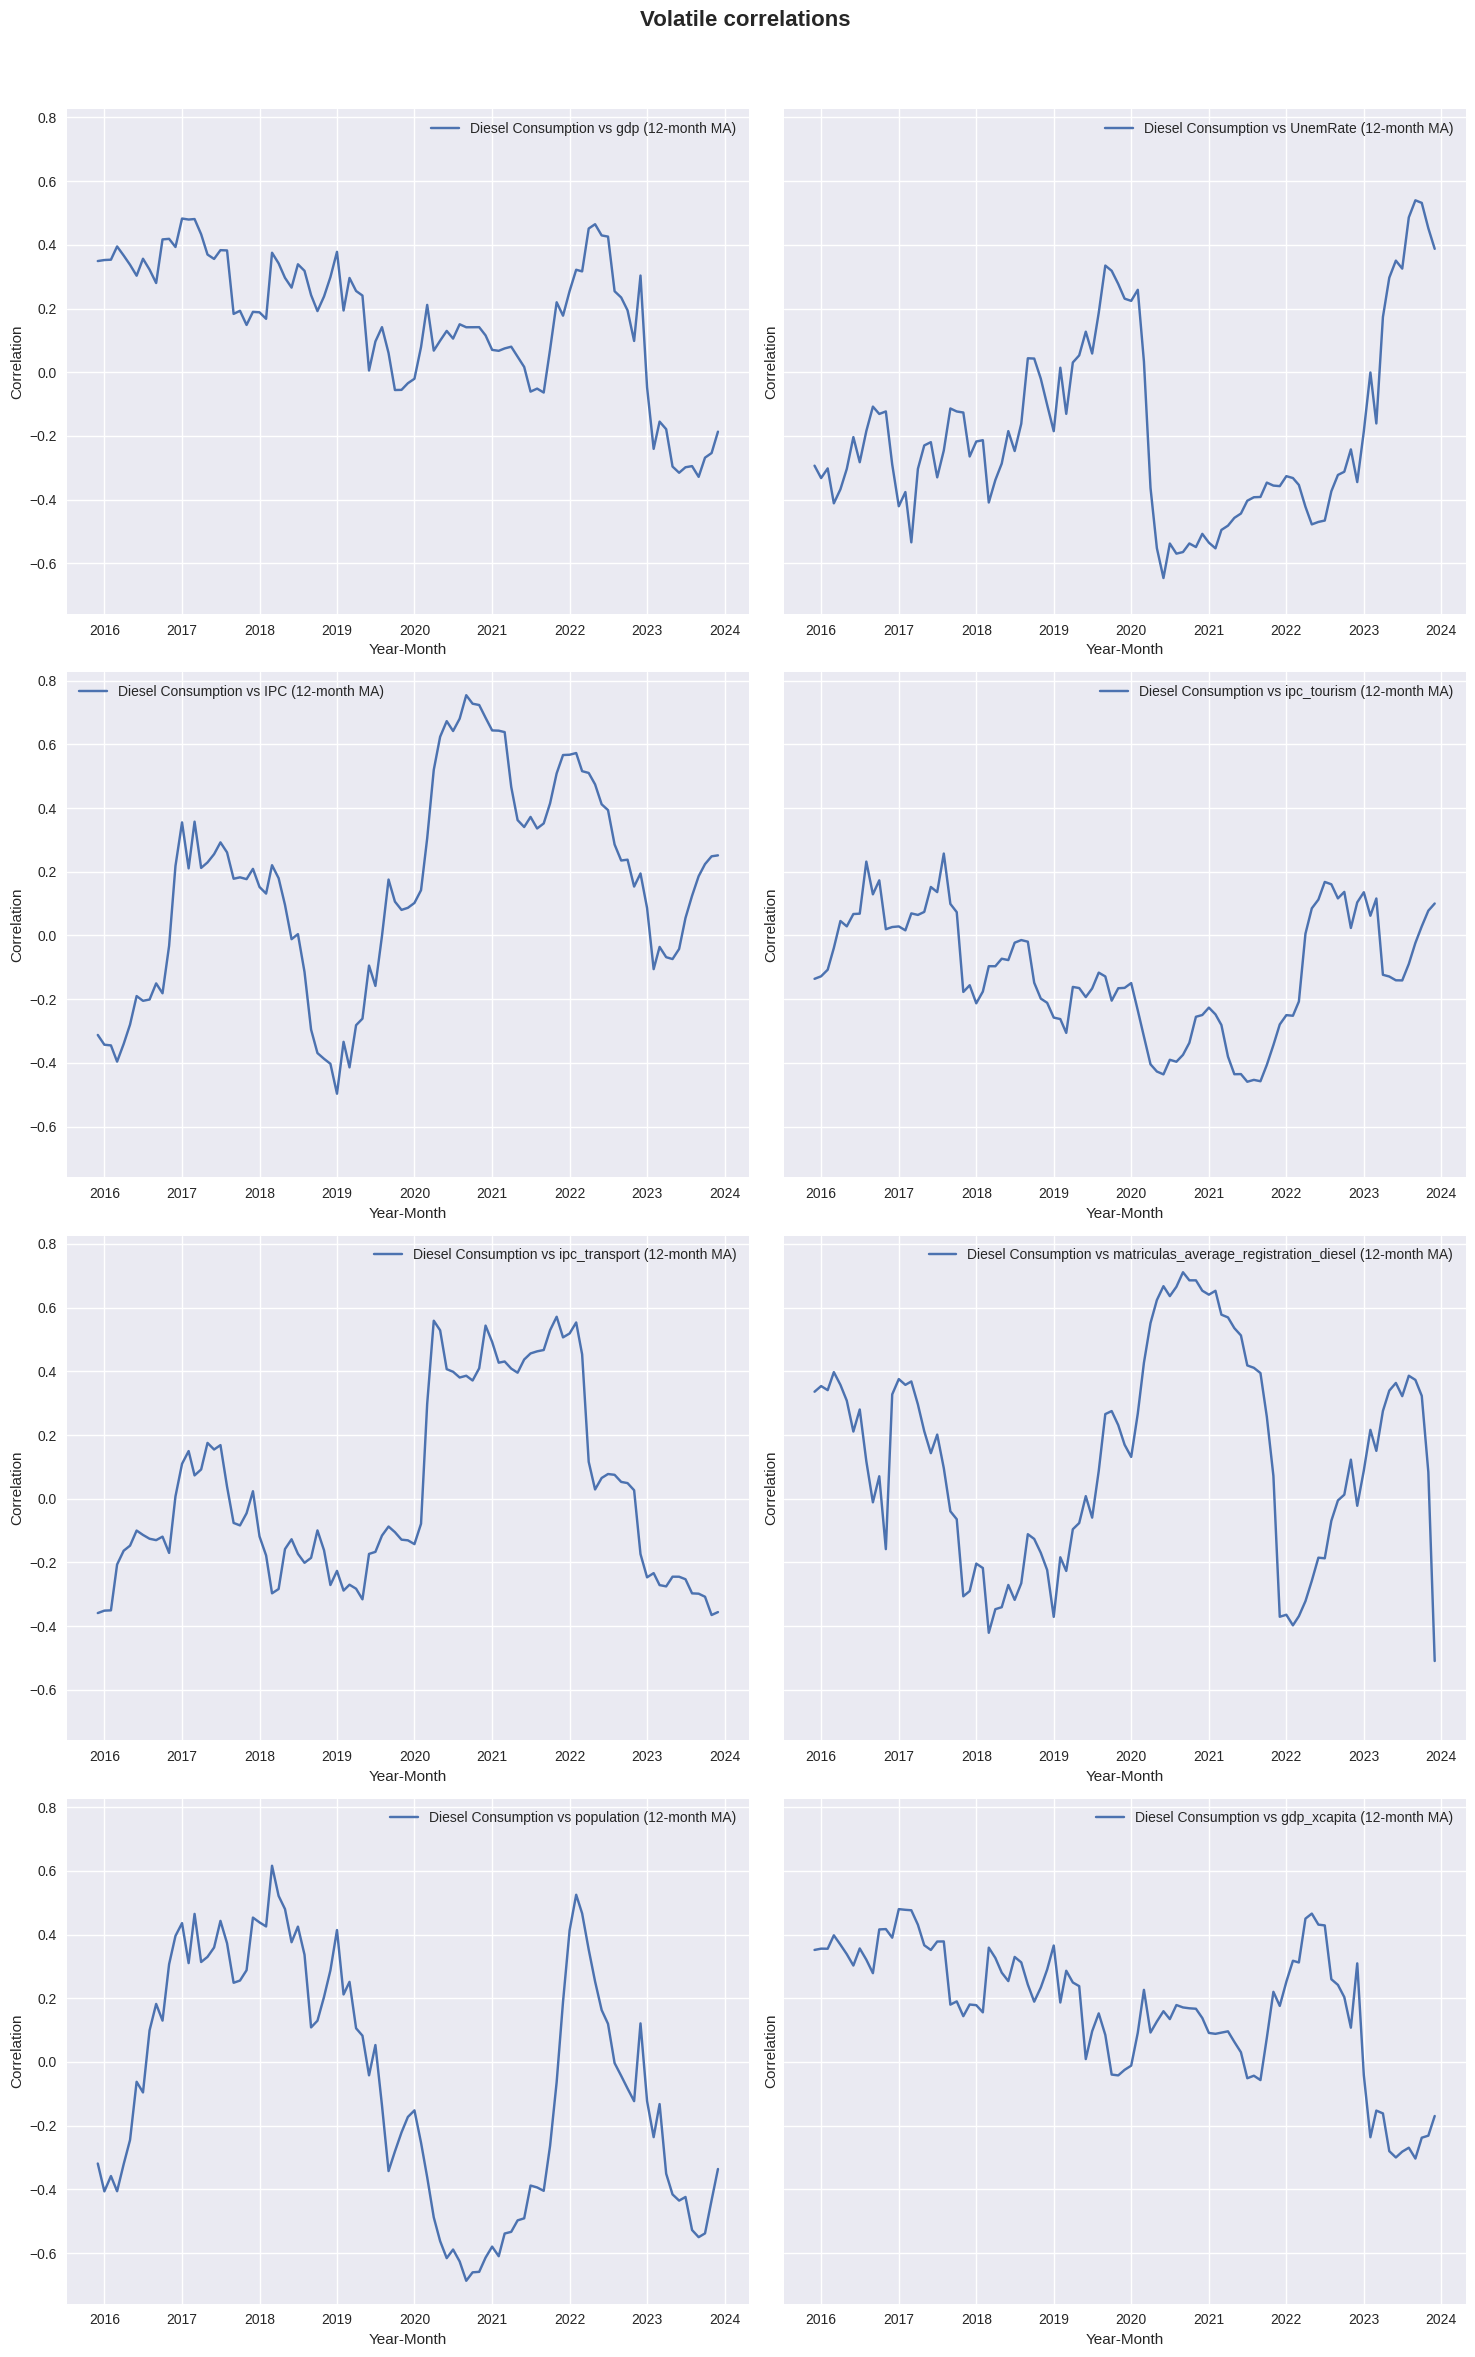

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_global[(df_global['year_month'] >= '2014-01-01') & (df_global['year_month'] <= '2023-12-31')].copy()

# Define the variables for volatile correlation
variables_volatile = ['gdp', 'UnemRate', 'IPC', 'ipc_tourism', 'ipc_transport', 'matriculas_average_registration_diesel', 'population', 'gdp_xcapita']

# Ensure that the columns exist in the dataframe
existing_columns_volatile = [var for var in variables_volatile if var in df_filtered.columns]

# Calculate the correlation between 'diesel_consumption' and the specified variables
for var in existing_columns_volatile:
    df_filtered[f'correlation_{var}'] = df_filtered[['diesel_consumption', var]].rolling(window=24).corr().iloc[0::2, -1].reset_index(drop=True)

# Plot the 12-month moving average of the correlations in the section "Volatile correlations"
fig, axes = plt.subplots(len(existing_columns_volatile) // 2 + len(existing_columns_volatile) % 2, 2, figsize=(15, len(existing_columns_volatile) * 3), sharey=True)
fig.suptitle('Volatile correlations', fontsize=16, fontweight='bold')

for i, var in enumerate(existing_columns_volatile):
    ax = axes[i // 2, i % 2]
    ax.plot(df_filtered['year_month'], df_filtered[f'correlation_{var}'], label=f'Diesel Consumption vs {var} (12-month MA)')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Correlation')
    ax.legend()
    ax.grid(True)

# Remove the empty subplot if the number of plots is odd
if len(existing_columns_volatile) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


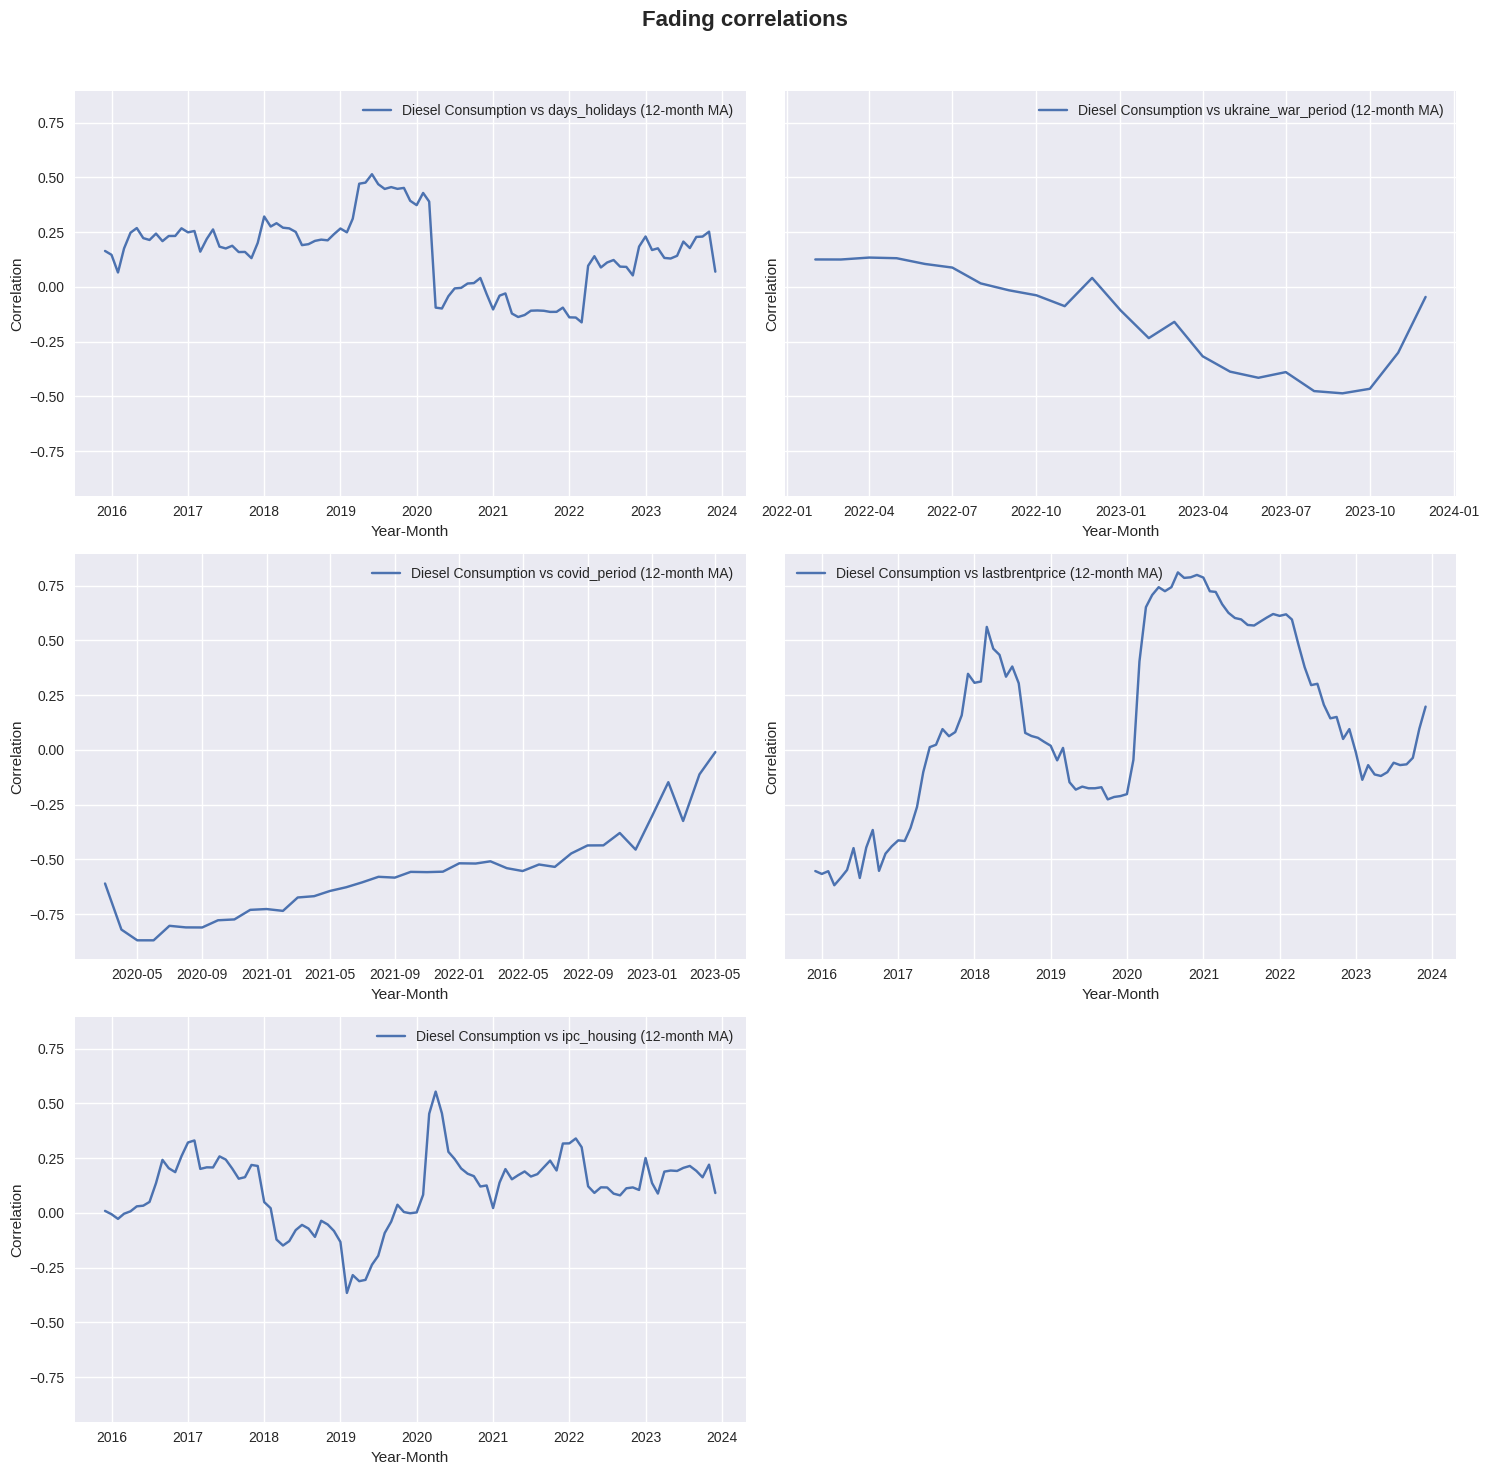

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_global[(df_global['year_month'] >= '2014-01-01') & (df_global['year_month'] <= '2023-12-31')].copy()

# Define the variables for fading correlation
variables_fading = ['days_holidays', 'ukraine_war_period', 'covid_period', 'lastbrentprice', 'ipc_housing']

# Ensure that the columns exist in the dataframe
existing_columns_fading = [var for var in variables_fading if var in df_filtered.columns]

# Calculate the correlation between 'diesel_consumption' and the specified variables
for var in existing_columns_fading:
    df_filtered[f'correlation_{var}'] = df_filtered[['diesel_consumption', var]].rolling(window=24).corr().iloc[0::2, -1].reset_index(drop=True)

# Plot the 12-month moving average of the correlations in the section "Fading correlations"
fig, axes = plt.subplots(len(existing_columns_fading) // 2 + len(existing_columns_fading) % 2, 2, figsize=(15, len(existing_columns_fading) * 3), sharey=True)
fig.suptitle('Fading correlations', fontsize=16, fontweight='bold')

for i, var in enumerate(existing_columns_fading):
    ax = axes[i // 2, i % 2]
    ax.plot(df_filtered['year_month'], df_filtered[f'correlation_{var}'], label=f'Diesel Consumption vs {var} (12-month MA)')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Correlation')
    ax.legend()
    ax.grid(True)

# Remove the empty subplot if the number of plots is odd
if len(existing_columns_fading) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [102]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Ensure the 'year_month' column is in datetime format
df_global['year_month'] = pd.to_datetime(df_global['year_month'], format='%m/%d/%y')

# Create the figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the fixed line for gasoline_consumption
fig.add_trace(
    go.Scatter(x=df_global['year_month'], y=df_global['diesel_consumption'], name='Diesel Consumption'),
    secondary_y=False,
)

# Add the line for surface_surface_area_to_build
fig.add_trace(
    go.Scatter(x=df_global['year_month'], y=df_global['surface_surface_area_to_build'], name='Surface Area to Build'),
    secondary_y=True,
)

# Update the y-axes titles
fig.update_yaxes(title_text="Diesel Consumption", secondary_y=False)
fig.update_yaxes(title_text="Surface Area to Build", secondary_y=True)

# Update the layout
fig.update_layout(
    title_text="Comparison of Gasoline Consumption with Surface Area",
    xaxis_title="Year-Month",
)

# Show the figure
fig.show()


In [103]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Ensure the 'year_month' column is in datetime format
df_global['year_month'] = pd.to_datetime(df_global['year_month'], format='%m/%d/%y')

# Create the figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the fixed line for gasoline_consumption
fig.add_trace(
    go.Scatter(x=df_global['year_month'], y=df_global['diesel_consumption'], name='Diesel Consumption'),
    secondary_y=False,
)

# Add the line for ipi
fig.add_trace(
    go.Scatter(x=df_global['year_month'], y=df_global['ipi'], name='Industrial Production Index'),
    secondary_y=True,
)

# Update the y-axes titles
fig.update_yaxes(title_text="Diesel Consumption", secondary_y=False)
fig.update_yaxes(title_text="IPI", secondary_y=True)

# Update the layout
fig.update_layout(
    title_text="Comparison of Diesel Consumption with IPI",
    xaxis_title="Year-Month",
)

# Show the figure
fig.show()


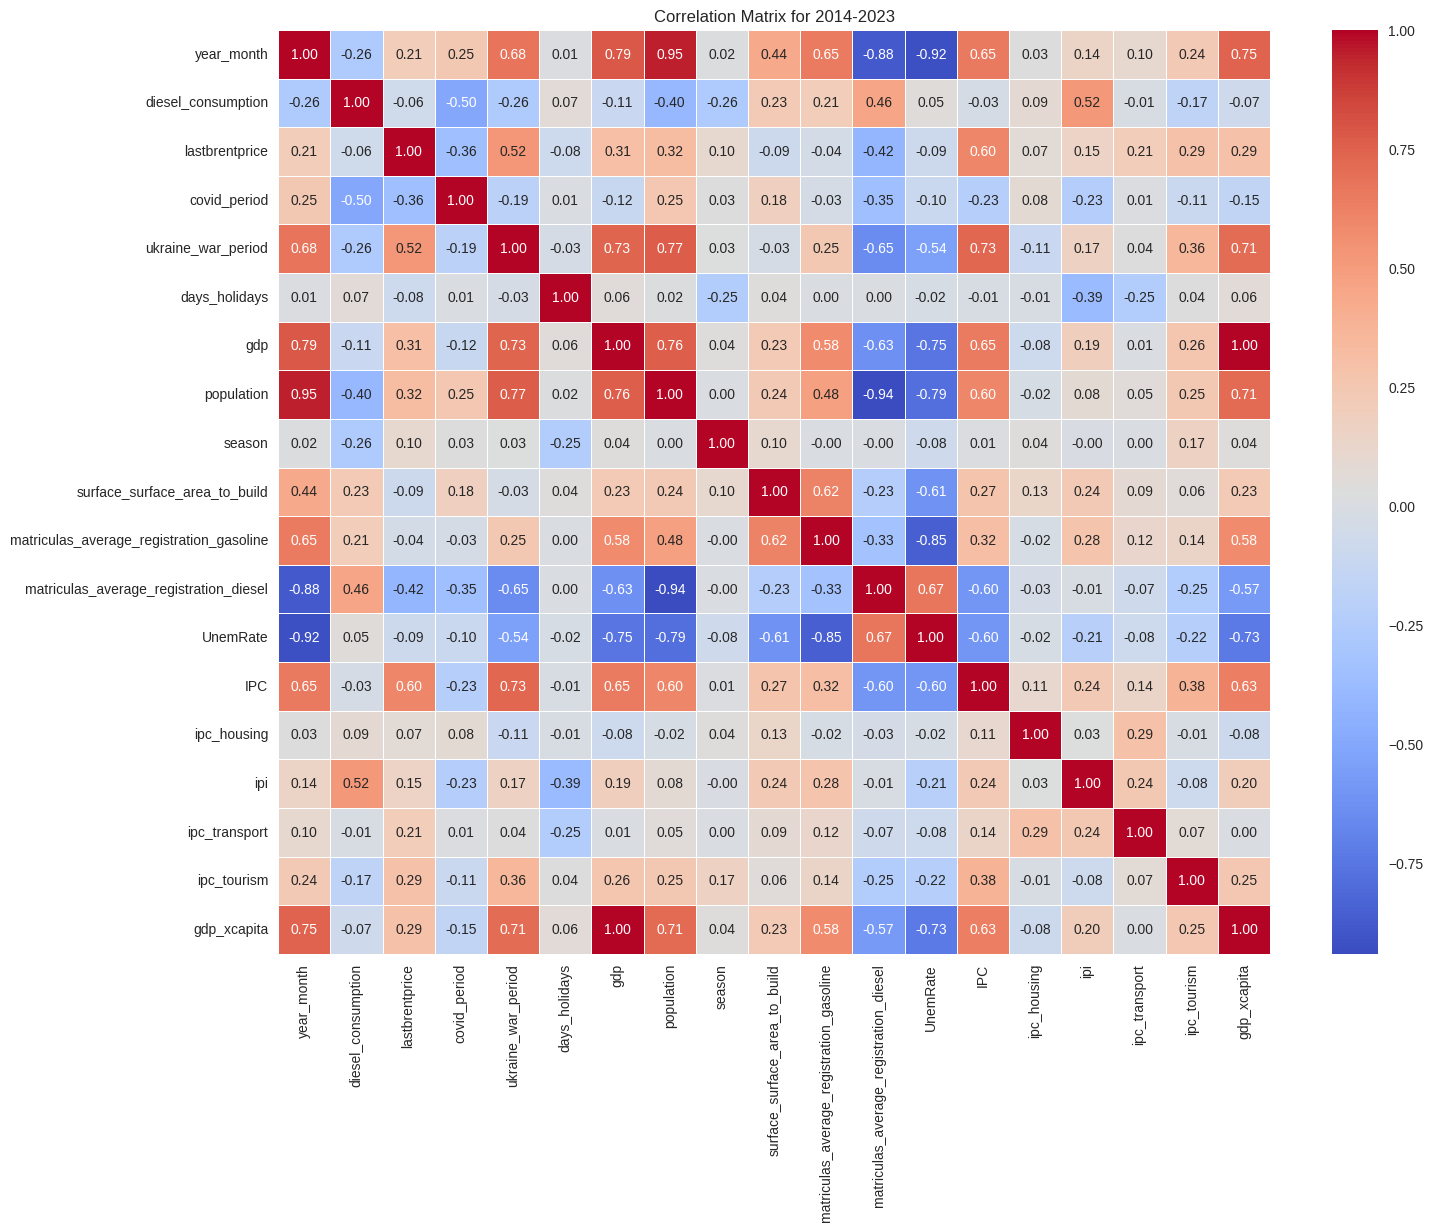

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_global[(df_global['year_month'] >= '2014-01-01') & (df_global['year_month'] <= '2023-12-31')]

# Exclude columns with "correlation" in their name
columns_to_exclude = [col for col in df_filtered.columns if 'correlation' in col]
df_filtered = df_filtered.drop(columns=columns_to_exclude)

# Exclude columns with "correlation" in their name
columns_to_exclude = [col for col in df_filtered.columns if '_ma' in col]
df_filtered = df_filtered.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for 2014-2023')
plt.show()


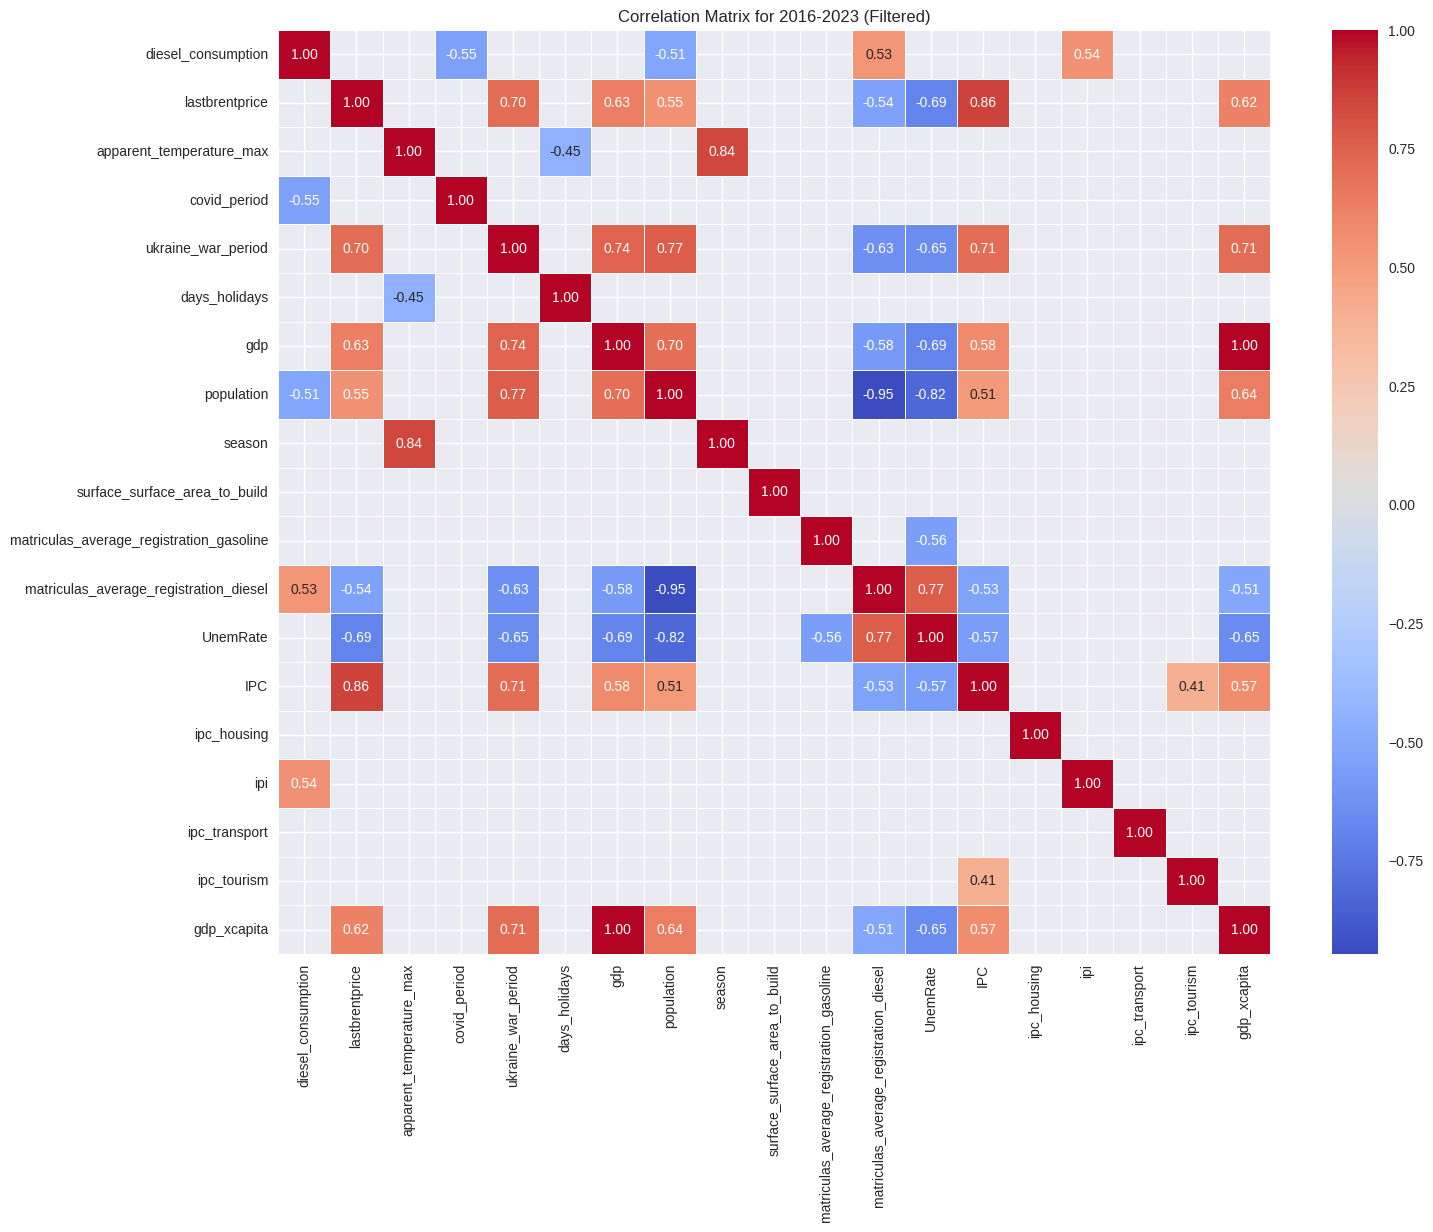

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_global[(df_global['year_month'] >= '2016-01-01') & (df_global['year_month'] <= '2023-12-31')]

# Columns to exclude
columns_to_exclude = ['year_month', 'diesel_consumption_ma', 'gdp_xcapita_ma']

# Drop the specified columns
df_filtered = df_filtered.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Filter the correlation matrix to only show values greater than 0.4 or less than -0.4
filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=filtered_corr_matrix.isnull())
plt.title('Correlation Matrix for 2016-2023 (Filtered)')
plt.show()


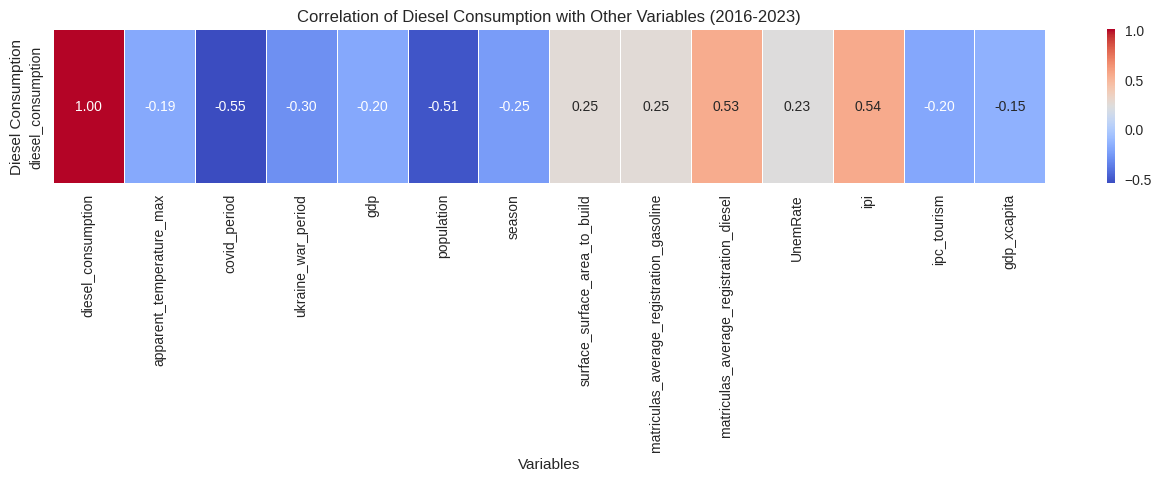

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_global[(df_global['year_month'] >= '2016-01-01') & (df_global['year_month'] <= '2023-12-31')]

# Columns to exclude
columns_to_exclude = ['year_month', 'diesel_consumption_ma', 'gdp_xcapita_ma']

# Drop the specified columns
df_filtered = df_filtered.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Filter the correlation matrix to only show values greater than 0.1 or less than -0.1
filtered_corr_matrix = correlation_matrix.loc[['diesel_consumption']].T
filtered_corr_matrix = filtered_corr_matrix[(filtered_corr_matrix['diesel_consumption'] > 0.1) | (filtered_corr_matrix['diesel_consumption'] < -0.1)]

# Generate a heatmap
plt.figure(figsize=(16, 2))
sns.heatmap(filtered_corr_matrix.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Diesel Consumption with Other Variables (2016-2023)')
plt.xlabel('Variables')
plt.ylabel('Diesel Consumption')
plt.show()


# Model Development

In [107]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   diesel_consumption                        122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   covid_period                              120 non-null    float64       
 5   ukraine_war_period                        121 non-null    float64       
 6   days_holidays                             120 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   season                          

In [108]:
# Fill missing values in covid_period column with 0
df_global['covid_period'].fillna(0, inplace=True)

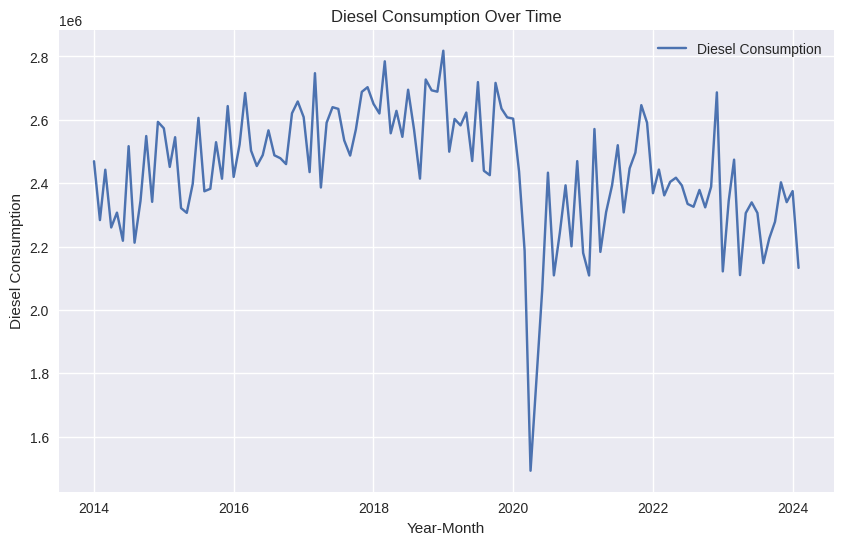

In [109]:
import matplotlib.pyplot as plt

# Plot the gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_global['year_month'], df_global['diesel_consumption'], label='Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Diesel Consumption Over Time')
plt.legend()
plt.show()

In [110]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_global['diesel_consumption'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('if p-value > 0.05 --> Data is not stationary')

ADF Statistic: -3.132258776132779
p-value: 0.024256186822759755
if p-value > 0.05 --> Data is not stationary


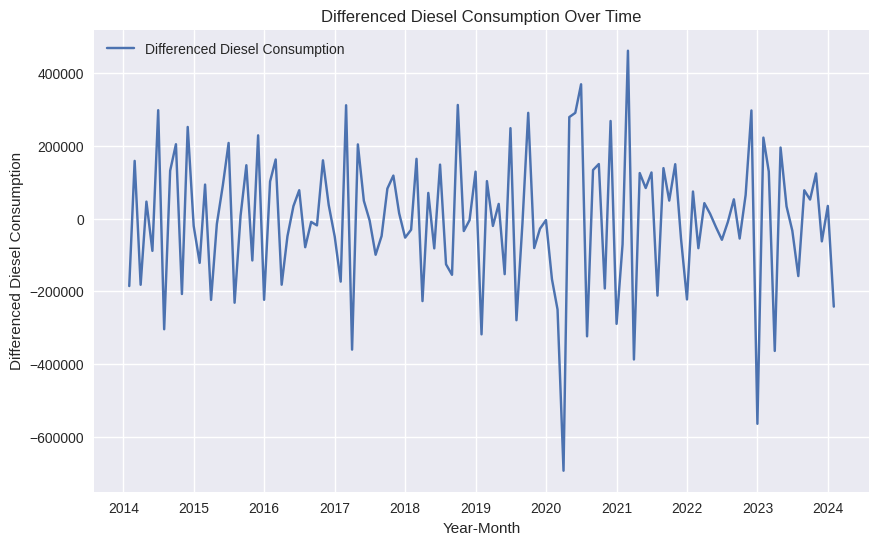

In [111]:
# Differencing the gasoline consumption
df_global['diesel_consumption_diff'] = df_global['diesel_consumption'].diff()

# Plot the differenced gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_global['year_month'], df_global['diesel_consumption_diff'], label='Differenced Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Differenced Diesel Consumption')
plt.title('Differenced Diesel Consumption Over Time')
plt.legend()
plt.show()

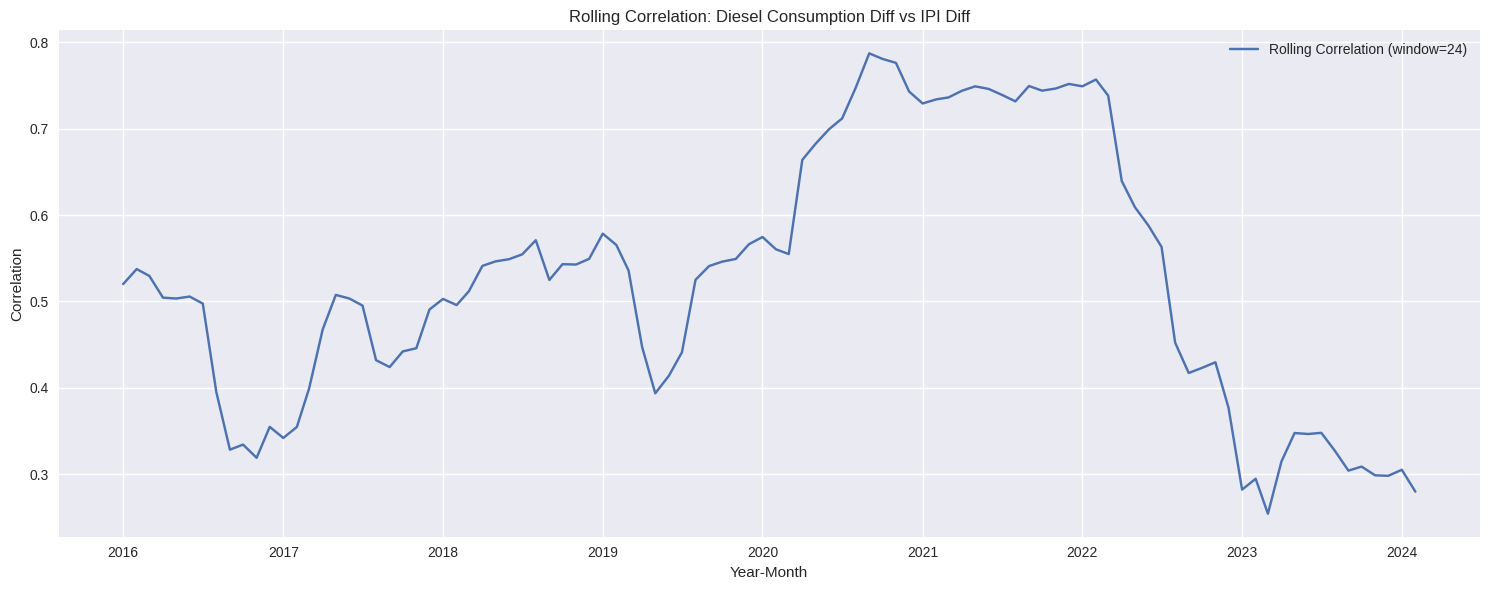

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the differenced DataFrame
df_diff = pd.DataFrame()
df_diff['year_month'] = df_global['year_month']
df_diff['diesel_consumption_diff'] = df_global['diesel_consumption'].diff()
df_diff['ipi_diff'] = df_global['ipi'].diff()

# Step 2: Calculate rolling correlation
window_size = 24
df_diff['rolling_correlation'] = df_diff['diesel_consumption_diff'].rolling(window=window_size).corr(df_diff['ipi_diff'])

# Drop NaN values resulting from the differencing and rolling calculation
df_diff.dropna(subset=['rolling_correlation'], inplace=True)

# Step 3: Plot the rolling correlation
plt.figure(figsize=(15, 6))
plt.plot(df_diff['year_month'], df_diff['rolling_correlation'], label=f'Rolling Correlation (window={window_size})')
plt.xlabel('Year-Month')
plt.ylabel('Correlation')
plt.title('Rolling Correlation: Diesel Consumption Diff vs IPI Diff')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_global['diesel_consumption_diff'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

print('if p-value < 0.05 --> Data is stationary')

ADF Statistic: -3.8970144251623484
p-value: 0.0020569294915766174
if p-value < 0.05 --> Data is stationary


In [114]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_result = acorr_ljungbox(df_global['diesel_consumption'].dropna(), lags=[10])

# Print the test results
print('Ljung-Box Test Statistic:', ljung_box_result['lb_stat'].values)
print('p-values:', ljung_box_result['lb_pvalue'].values)
print('if p-value < 0.05 --> Data is correlated (and not WN)')

Ljung-Box Test Statistic: [141.06784892]
p-values: [2.54601726e-25]
if p-value < 0.05 --> Data is correlated (and not WN)


In [115]:
# Split the data
train = df_global[df_global['year_month'] < '2023-01-01']
test = df_global[df_global['year_month'] >= '2023-01-01']

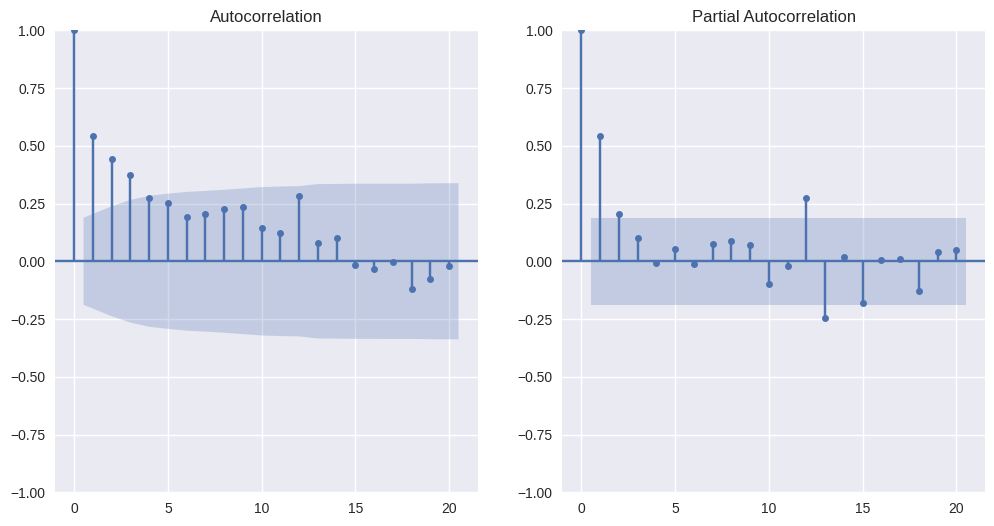

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train['diesel_consumption'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(train['diesel_consumption'], lags=20, ax=plt.gca())
plt.show()

In [117]:
import statsmodels.api as sm

# Define the SARIMAX model with the new exogenous variable
model = sm.tsa.statespace.SARIMAX(train['diesel_consumption'],
                                  order=(0, 1, 1),
                                  seasonal_order=(0, 1, 1, 12),
                                  exog=train[['ipi']])

# Fit the model
sarimax_model = model.fit()

# Print the statistical summary
print(sarimax_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 diesel_consumption   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1234.609
Date:                            Wed, 10 Jul 2024   AIC                           2477.218
Time:                                    11:31:26   BIC                           2487.434
Sample:                                         0   HQIC                          2481.346
                                            - 108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ipi         2.238e+04   1075.650     20.810      0.000    2.03e+04    2.45e+04
ma.L1         -0.5398      0.107   

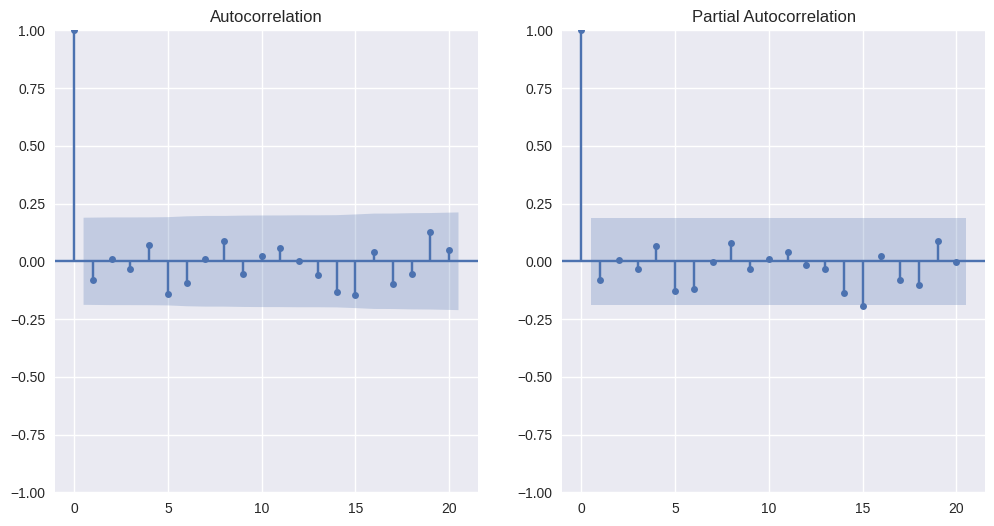

In [118]:
# Plot ACF and PACF of residuals
residuals = sarimax_model.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.show()

In [119]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
ljung_box_result_resid = acorr_ljungbox(residuals, lags=[10])

# Print the test results
print('Ljung-Box Test Statistic (Residuals):', ljung_box_result_resid['lb_stat'].values)
print('p-values (Residuals):', ljung_box_result_resid['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

Ljung-Box Test Statistic (Residuals): [6.15171943]
p-values (Residuals): [0.80235937]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [120]:
# Drop rows with dates beyond 2023
df_global = df_global[df_global['year_month'] < '2024-01-01']

In [121]:
# Ensure there are no infinite values
df_global['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify if there are any remaining NaNs or infinite values
print(df_global[['covid_period']].isnull().sum())
print(np.isfinite(df_global[['covid_period']]).sum())

covid_period    0
dtype: int64
covid_period    120
dtype: int64


In [122]:
# Fill missing values with 0
train['covid_period'].fillna(0, inplace=True)
test['covid_period'].fillna(0, inplace=True)

# Replace infinite values with 0
train['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
test['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify that there are no more infinite or missing values
print('Missing values in train:', train[['covid_period']].isnull().sum())
print('Infinite values in train:', np.isfinite(train[['covid_period']]).sum())
print('Missing values in test:', test[['covid_period']].isnull().sum())
print('Infinite values in test:', np.isfinite(test[['covid_period']]).sum())

Missing values in train: covid_period    0
dtype: int64
Infinite values in train: covid_period    108
dtype: int64
Missing values in test: covid_period    0
dtype: int64
Infinite values in test: covid_period    14
dtype: int64


In [123]:
# Ensure the indices are properly aligned
test_exog = test[['ipi']]

# Make predictions for the test set
predictions = sarimax_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog, dynamic=False)

# Add in-sample predictions to the DataFrame
train_exog = train[['covid_period']]
in_sample_predictions = sarimax_model.predict(start=0, end=len(train) - 1, exog=train_exog, dynamic=False)

# Combine in-sample and out-of-sample predictions
full_predictions = pd.concat([in_sample_predictions, predictions])

# Ensure the length of predictions matches the length of df_global
df_global['predictions'] = full_predictions.reset_index(drop=True)

In [124]:
# Ensure that the length of the predictions for 2023 matches the number of rows in 2023
rows_2023 = df_global[df_global['year_month'] >= '2023-01-01'].index
if len(predictions) == len(rows_2023):
    df_global.loc[rows_2023, 'historical_and_predicted'] = predictions.values
else:
    print(f"Length mismatch: predictions length is {len(predictions)}, but 2023 rows count is {len(rows_2023)}")

Length mismatch: predictions length is 14, but 2023 rows count is 12


In [125]:
df_global

,year_month,diesel_consumption,lastbrentprice,apparent_temperature_max,covid_period,ukraine_war_period,days_holidays,gdp,population,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,UnemRate,IPC,ipc_housing,ipi,ipc_transport,ipc_tourism,gdp_xcapita,diesel_consumption_ma,gdp_xcapita_ma,diesel_consumption_diff,predictions
0,2014-01-01,2469135.15,106.40,10.517059,0.0,0.0,30.0,8.538266e+07,4.635568e+07,0.0,727.000000,34265.0,60913.0,23.187844,0.187784,0.490487,90.166059,-0.455671,-0.224152,1841.903044,NaN,NaN,NaN,2.018265e+06
1,2014-02-01,2283474.50,109.07,10.164118,0.0,0.0,1.0,8.767350e+07,4.634138e+07,0.0,768.000000,34265.0,60913.0,23.189689,-0.001727,0.169606,90.192597,-0.033286,0.114806,1891.905315,NaN,NaN,-185660.65,2.281290e+06
2,2014-03-01,2442389.73,107.76,14.177059,0.0,0.0,3.0,8.052950e+07,4.632708e+07,0.0,1084.000000,34265.0,60913.0,23.191537,-0.113524,0.043148,95.731023,-0.018978,0.263314,1738.281378,NaN,NaN,158915.23,2.406339e+06
3,2014-04-01,2260243.61,108.07,19.292353,0.0,0.0,35.0,8.512199e+07,4.631659e+07,17.0,1282.000000,34265.0,60913.0,21.897757,0.335715,-0.026508,89.897281,0.450390,0.811285,1837.829339,NaN,NaN,-182146.12,2.292695e+06
4,2014-05-01,2307027.36,109.41,20.467647,0.0,0.0,19.0,8.559173e+07,4.630611e+07,17.0,996.000000,34265.0,60913.0,21.899147,0.218115,0.072257,95.454825,0.106547,-0.122137,1848.389786,NaN,NaN,46783.75,2.402068e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08-01,2147786.50,86.83,31.961765,0.0,1.0,15.0,1.138127e+08,4.791682e+07,17.0,1597.005600,79278.0,34148.0,10.794721,2.346879,-0.206762,81.420756,2.877024,0.225436,2375.214181,2.327182e+06,2520.721393,-158196.90,2.273936e+06
116,2023-09-01,2225833.12,95.31,27.675294,0.0,1.0,4.0,1.300123e+08,4.791682e+07,17.0,1834.974786,79278.0,34148.0,10.794721,3.157379,0.401116,101.164281,1.017878,0.155962,2713.292609,2.314456e+06,2545.922032,78046.62,2.324632e+06
117,2023-10-01,2278332.10,85.02,23.296471,0.0,1.0,15.0,1.131505e+08,4.791682e+07,17.0,1706.332566,79278.0,34148.0,10.648678,3.111947,-0.705754,101.936769,-0.871311,0.213819,2361.393960,2.310680e+06,2530.712643,52498.98,2.437464e+06
118,2023-11-01,2402673.60,80.86,16.107647,0.0,1.0,15.0,1.134621e+08,4.791682e+07,0.0,986.032518,79278.0,34148.0,10.648678,2.908743,-1.416991,105.048944,-1.479031,-0.534955,2367.898176,2.311843e+06,2521.190333,124341.50,2.491581e+06


In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAPE
mape = np.mean(np.abs((test['diesel_consumption'] - predictions) / test['diesel_consumption'])) * 100

# Calculate MAE and RMSE
mae = mean_absolute_error(test['diesel_consumption'], predictions)
rmse = np.sqrt(mean_squared_error(test['diesel_consumption'], predictions))

# Print accuracy metrics
print('MAPE:', mape)
print('MAE:', mae)
print('RMSE:', rmse)

MAPE: 6.023434668675021
MAE: 135002.86766436746
RMSE: 153283.30872402395


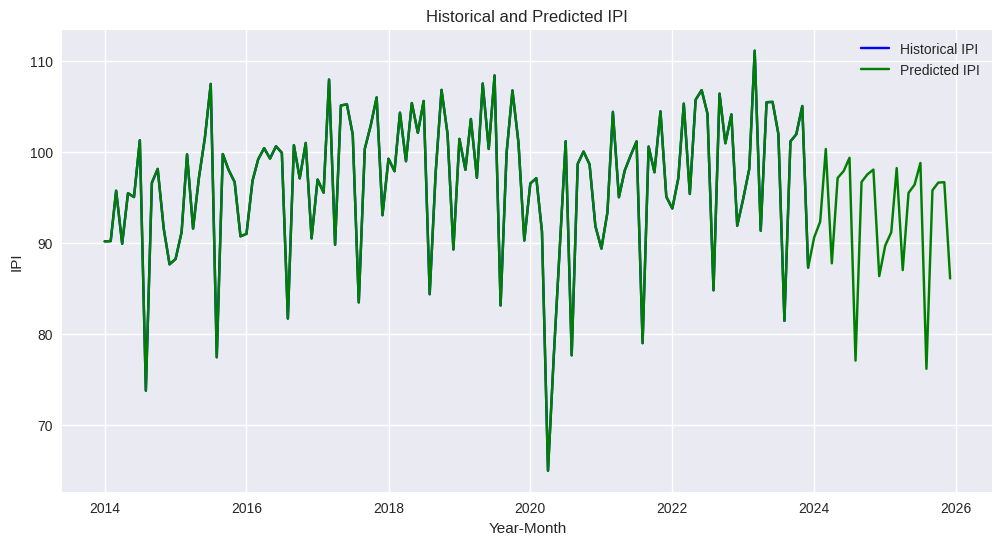

In [127]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure there are no infinite values
df_global['ipi'].replace([np.inf, -np.inf], 0, inplace=True)

# Define the SARIMAX model for IPI
model_ipi = sm.tsa.statespace.SARIMAX(df_global['ipi'],
                                      order=(0, 1, 0),
                                      seasonal_order=(1, 1, 1, 12))

# Fit the model
sarimax_model_ipi = model_ipi.fit()

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates_ipi = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df_ipi = pd.DataFrame({'year_month': future_dates_ipi})

# Make predictions for the future period (2024 and 2025) for IPI
future_predictions_ipi = sarimax_model_ipi.get_forecast(steps=len(future_df_ipi)).predicted_mean

# Combine historical and future data for IPI
combined_df_ipi = pd.concat([df_global[['year_month', 'ipi']], future_df_ipi], ignore_index=True)
combined_df_ipi['predicted_ipi'] = pd.concat([df_global['ipi'], future_predictions_ipi], ignore_index=True)

# Plot IPI predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['ipi'], label='Historical IPI', color='blue')
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['predicted_ipi'], label='Predicted IPI', color='green')
plt.xlabel('Year-Month')
plt.ylabel('IPI')
plt.title('Historical and Predicted IPI')
plt.legend()
plt.show()



In [128]:
combined_df_ipi

,year_month,ipi,predicted_ipi
0,2014-01-01,90.166059,90.166059
1,2014-02-01,90.192597,90.192597
2,2014-03-01,95.731023,95.731023
3,2014-04-01,89.897281,89.897281
4,2014-05-01,95.454825,95.454825
...,...,...,...
139,2025-08-01,NaN,76.148233
140,2025-09-01,NaN,95.781234
141,2025-10-01,NaN,96.626151
142,2025-11-01,NaN,96.669773


In [129]:
df_global

,year_month,diesel_consumption,lastbrentprice,apparent_temperature_max,covid_period,ukraine_war_period,days_holidays,gdp,population,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,UnemRate,IPC,ipc_housing,ipi,ipc_transport,ipc_tourism,gdp_xcapita,diesel_consumption_ma,gdp_xcapita_ma,diesel_consumption_diff,predictions
0,2014-01-01,2469135.15,106.40,10.517059,0.0,0.0,30.0,8.538266e+07,4.635568e+07,0.0,727.000000,34265.0,60913.0,23.187844,0.187784,0.490487,90.166059,-0.455671,-0.224152,1841.903044,NaN,NaN,NaN,2.018265e+06
1,2014-02-01,2283474.50,109.07,10.164118,0.0,0.0,1.0,8.767350e+07,4.634138e+07,0.0,768.000000,34265.0,60913.0,23.189689,-0.001727,0.169606,90.192597,-0.033286,0.114806,1891.905315,NaN,NaN,-185660.65,2.281290e+06
2,2014-03-01,2442389.73,107.76,14.177059,0.0,0.0,3.0,8.052950e+07,4.632708e+07,0.0,1084.000000,34265.0,60913.0,23.191537,-0.113524,0.043148,95.731023,-0.018978,0.263314,1738.281378,NaN,NaN,158915.23,2.406339e+06
3,2014-04-01,2260243.61,108.07,19.292353,0.0,0.0,35.0,8.512199e+07,4.631659e+07,17.0,1282.000000,34265.0,60913.0,21.897757,0.335715,-0.026508,89.897281,0.450390,0.811285,1837.829339,NaN,NaN,-182146.12,2.292695e+06
4,2014-05-01,2307027.36,109.41,20.467647,0.0,0.0,19.0,8.559173e+07,4.630611e+07,17.0,996.000000,34265.0,60913.0,21.899147,0.218115,0.072257,95.454825,0.106547,-0.122137,1848.389786,NaN,NaN,46783.75,2.402068e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08-01,2147786.50,86.83,31.961765,0.0,1.0,15.0,1.138127e+08,4.791682e+07,17.0,1597.005600,79278.0,34148.0,10.794721,2.346879,-0.206762,81.420756,2.877024,0.225436,2375.214181,2.327182e+06,2520.721393,-158196.90,2.273936e+06
116,2023-09-01,2225833.12,95.31,27.675294,0.0,1.0,4.0,1.300123e+08,4.791682e+07,17.0,1834.974786,79278.0,34148.0,10.794721,3.157379,0.401116,101.164281,1.017878,0.155962,2713.292609,2.314456e+06,2545.922032,78046.62,2.324632e+06
117,2023-10-01,2278332.10,85.02,23.296471,0.0,1.0,15.0,1.131505e+08,4.791682e+07,17.0,1706.332566,79278.0,34148.0,10.648678,3.111947,-0.705754,101.936769,-0.871311,0.213819,2361.393960,2.310680e+06,2530.712643,52498.98,2.437464e+06
118,2023-11-01,2402673.60,80.86,16.107647,0.0,1.0,15.0,1.134621e+08,4.791682e+07,0.0,986.032518,79278.0,34148.0,10.648678,2.908743,-1.416991,105.048944,-1.479031,-0.534955,2367.898176,2.311843e+06,2521.190333,124341.50,2.491581e+06


In [130]:
# Extending df_global to match the date range of combined_df_ipi
extended_dates = pd.date_range(start=df_global['year_month'].min(), end=combined_df_ipi['year_month'].max(), freq='MS')
extended_df_global = pd.DataFrame({'year_month': extended_dates})

# Merging the extended df_global with the original data
extended_df_global = pd.merge(extended_df_global, df_global, on='year_month', how='left')

# Adding the predicted_ipi column from combined_df_ipi
global_df = pd.merge(extended_df_global, combined_df_ipi[['year_month', 'predicted_ipi']], on='year_month', how='left')

In [131]:
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def download_excel(df):
    # Create a BytesIO buffer to save the Excel file
    output = BytesIO()
    # Using the default Excel writer
    df.to_excel(output, index=False)
    output.seek(0)

    # Encode the Excel file to base64
    data = base64.b64encode(output.read()).decode('utf-8')

    # Generate a download link
    html = '<a download="df_filled.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{0}" target="_blank">Download Excel file</a>'.format(data)
    display(HTML(html))

# Assume df is your DataFrame
download_excel(df_global)

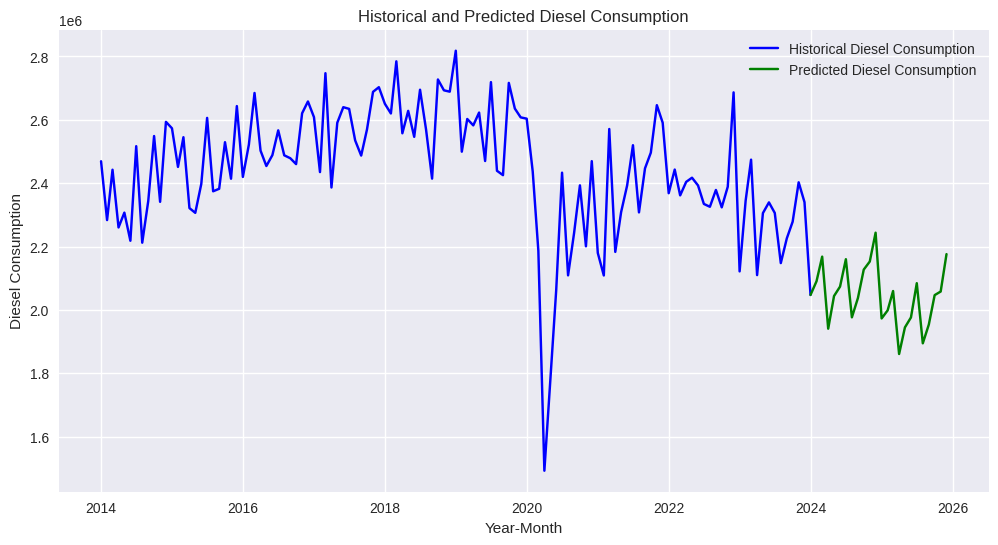

In [132]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Ensure there are no missing or infinite values in the 'ipi' column
df_global['ipi'].fillna(0, inplace=True)
df_global['ipi'].replace([np.inf, -np.inf], 0, inplace=True)

# Define the SARIMAX model using diesel consumption and 'ipi' as exogenous variable
model = sm.tsa.statespace.SARIMAX(df_global['diesel_consumption'],
                                  order=(0, 1, 0),
                                  seasonal_order=(1, 1, 1, 12),
                                  exog=df_global[['ipi']])

# Fit the model
sarimax_model = model.fit()

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df = pd.DataFrame({'year_month': future_dates})

# Ensure the future dates DataFrame includes the predicted IPI values
future_df['ipi'] = future_predictions_ipi.values

# Ensure there are no missing or infinite values in the future exogenous variable 'ipi'
future_df['ipi'].fillna(0, inplace=True)
future_df['ipi'].replace([np.inf, -np.inf], 0, inplace=True)

# Make predictions for the future period (2024 and 2025)
future_exog = future_df[['ipi']]
future_predictions = sarimax_model.get_forecast(steps=len(future_df), exog=future_exog).predicted_mean

# Combine historical and future data for plotting
combined_df = pd.concat([df_global, future_df], ignore_index=True)

# Set the predictions in the combined DataFrame
combined_df['predictions'] = pd.concat([df_global['diesel_consumption'], future_predictions], ignore_index=True)

# Create the 'historical_and_predicted' column
combined_df['historical_and_predicted'] = combined_df['predictions']

# Plot historical and predicted values
plt.figure(figsize=(12, 6))

# Plot historical data in blue
plt.plot(combined_df[combined_df['year_month'] < '2024-02-01']['year_month'],
         combined_df[combined_df['year_month'] < '2024-02-01']['historical_and_predicted'],
         label='Historical Diesel Consumption', color='blue')

# Plot predicted data in green
plt.plot(combined_df[combined_df['year_month'] >= '2024-01-01']['year_month'],
         combined_df[combined_df['year_month'] >= '2024-01-01']['historical_and_predicted'],
         label='Predicted Diesel Consumption', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Historical and Predicted Diesel Consumption')
plt.legend()
plt.show()

